In [78]:
import pandas as pd
pd.options.mode.chained_assignment = None
import numpy as np
import lifelines
from lifelines.utils import datetimes_to_durations
from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter
from sklearn.preprocessing import  LabelEncoder
import lifelines as sa
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
import datetime
warnings.filterwarnings('ignore')
%matplotlib inline

In [79]:
df=pd.read_csv('df_cox_master.csv')
df.columns

Index(['Asset_Number', 'ELR', 'High_Level_Asset_Class', 'Asset_Class_Grouping',
       'Grouping_Full_Name', 'Engineering_Suffix', 'System_Asset_Type',
       'EQUIP_CLASS_DESC', 'birth', 'death', 'event', 'duration', 'T',
       'Start_Latitude', 'Start_Longitude', 'End_Latitude', 'End_Longitude',
       'midpoint_Latitude', 'midpoint_Longitude', 'weather_station', 'Sum'],
      dtype='object')

In [80]:
len(df)

940

In [82]:
df.isnull().sum()

Asset_Number                0
ELR                         0
High_Level_Asset_Class      0
Asset_Class_Grouping        0
Grouping_Full_Name          0
Engineering_Suffix          0
System_Asset_Type           0
EQUIP_CLASS_DESC            0
birth                       0
death                     637
event                       0
duration                    0
T                           0
Start_Latitude              0
Start_Longitude             0
End_Latitude               34
End_Longitude              34
midpoint_Latitude          34
midpoint_Longitude         34
weather_station             0
Sum                       293
dtype: int64

In [83]:
df['Sum'].describe()

count     647.000000
mean       71.471406
std       131.500281
min         1.000000
25%        14.500000
50%        28.000000
75%       103.500000
max      1672.000000
Name: Sum, dtype: float64

In [84]:
df['T'].describe()

count    940.000000
mean     348.996930
std      237.981697
min        0.041667
25%      123.024606
50%      342.777732
75%      503.054814
max      799.324942
Name: T, dtype: float64

In [85]:
df[['event']].head()

,event
0,0
1,1
2,1
3,1
4,0


In [86]:
df.birth.max(), df.birth.min()

('31/12/2017 13:55', '01/01/2017 09:00')

In [87]:
#df.death.max(), df.death.min()# not possible because of censored data

In [88]:
df.event.unique()

array([0, 1], dtype=int64)

In [89]:
# def event_observed(x):
#     if pd.isnull(x.death):
#         return 0
#     else:
#         return 1

In [90]:
# df['event_happens']=df.apply(lambda row: event_observed(row), axis=1 )

In [94]:
kmf = KaplanMeierFitter() 

In [95]:
kmf.fit(df['T'], df['event'],label='Kaplan Meier Estimate')

<lifelines.KaplanMeierFitter:"Kaplan Meier Estimate", fitted with 940 total observations, 637 right-censored observations>

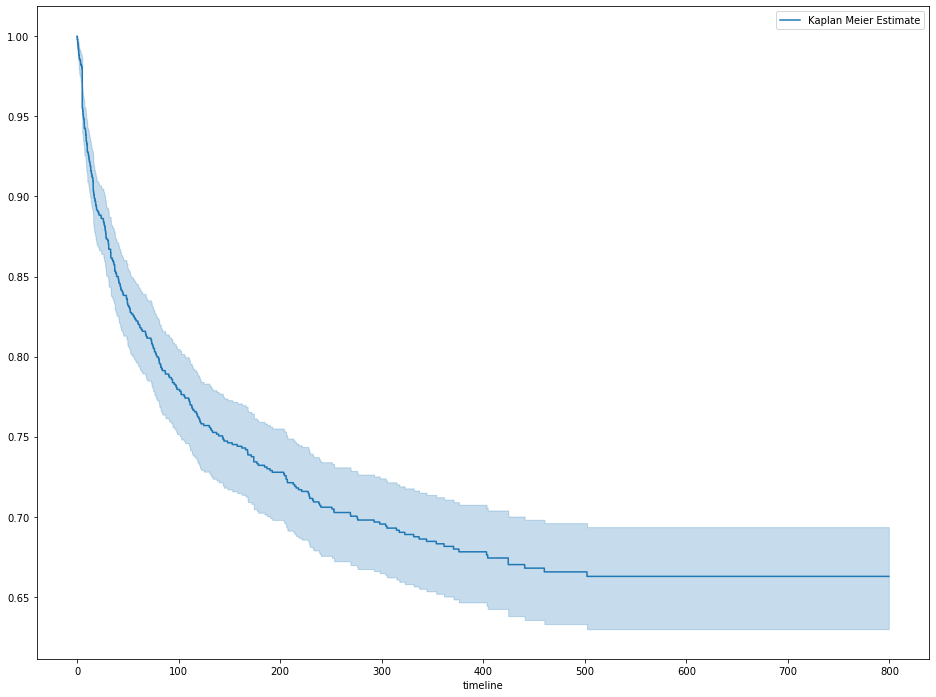

In [96]:
## Create an estimate
plt.figure(figsize=(16,12))
kmf.plot(ci_show=True) ## ci_show is meant for Confidence interval, since our data set is too tiny, thus i am not showing it.

In [104]:
T=df['T']
E=df['event']




from lifelines import NelsonAalenFitter
naf = NelsonAalenFitter()

naf.fit(T,event_observed=E)

<lifelines.NelsonAalenFitter:"NA_estimate", fitted with 940 total observations, 637 right-censored observations>

          NA_estimate
timeline             
0.000000     0.000000
0.041667     0.002129
0.427778     0.003195
0.459028     0.004262
0.791435     0.005331


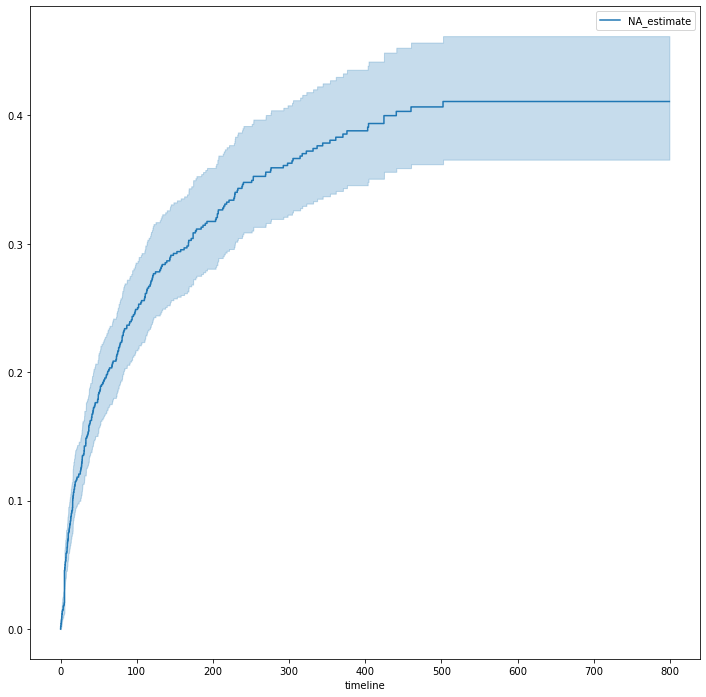

In [106]:
print(naf.cumulative_hazard_.head())
naf.plot(figsize=(12, 12))


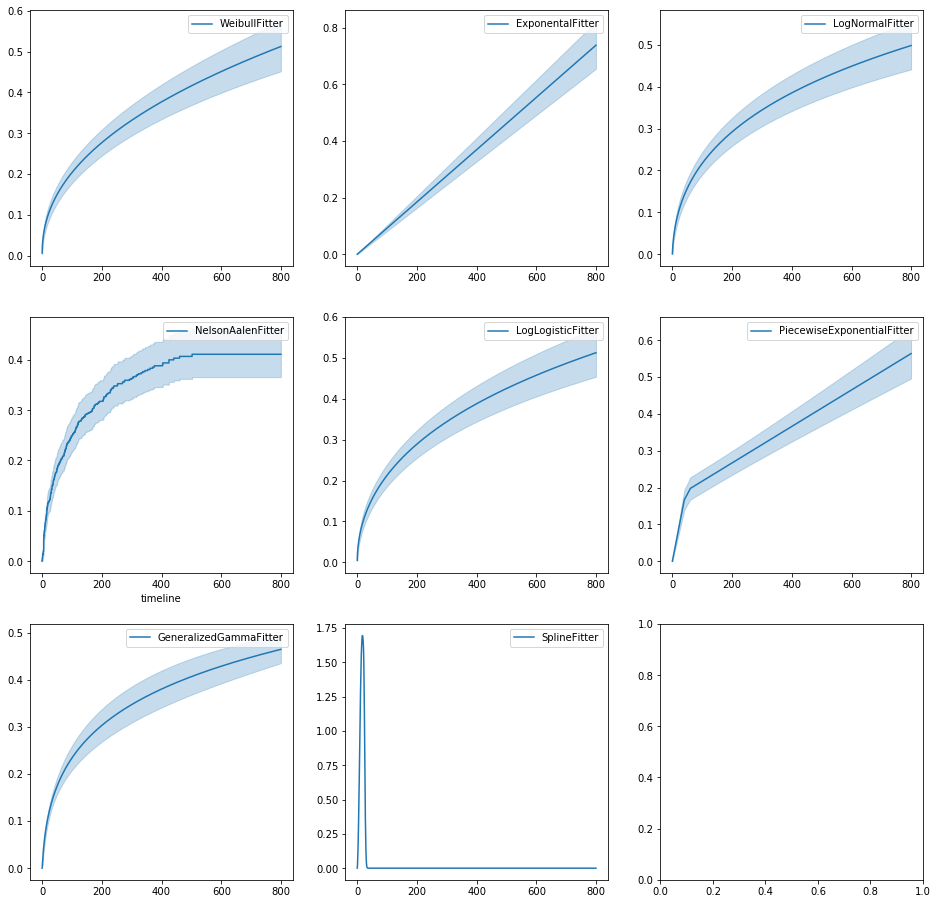

In [103]:
from lifelines import (WeibullFitter, ExponentialFitter,
LogNormalFitter, LogLogisticFitter, NelsonAalenFitter,
PiecewiseExponentialFitter, GeneralizedGammaFitter, SplineFitter)

from lifelines.datasets import load_waltons
data = load_waltons()

fig, axes = plt.subplots(3, 3, figsize=(16, 16))

T=df['T']
E=df['event']

wbf = WeibullFitter().fit(T, E, label='WeibullFitter')
exf = ExponentialFitter().fit(T, E, label='ExponentalFitter')
lnf = LogNormalFitter().fit(T, E, label='LogNormalFitter')
naf = NelsonAalenFitter().fit(T, E, label='NelsonAalenFitter')
llf = LogLogisticFitter().fit(T, E, label='LogLogisticFitter')
pwf = PiecewiseExponentialFitter([40, 60]).fit(T, E, label='PiecewiseExponentialFitter')
gg = GeneralizedGammaFitter().fit(T, E, label='GeneralizedGammaFitter')
spf = SplineFitter([6, 20, 40, 75]).fit(T, E, label='SplineFitter')

wbf.plot_cumulative_hazard(ax=axes[0][0])
exf.plot_cumulative_hazard(ax=axes[0][1])
lnf.plot_cumulative_hazard(ax=axes[0][2])
naf.plot_cumulative_hazard(ax=axes[1][0])
llf.plot_cumulative_hazard(ax=axes[1][1])
pwf.plot_cumulative_hazard(ax=axes[1][2])
gg.plot_cumulative_hazard(ax=axes[2][0])
spf.plot_cumulative_hazard(ax=axes[2][1])

In [98]:
groups = df['High_Level_Asset_Class']   
groups.unique()

array(['Track', 'P&C', 'S&T', 'E&P'], dtype=object)

In [99]:
  
i1 = (groups == 'Track')      ## group i1 , having the pandas series  for the 1st cohort
i2 = (groups == 'P&C')     ## group i2 , having the pandas series  for the 2nd cohort
i3 = (groups == 'S&T')      ## group i1 , having the pandas series  for the 1st cohort
i4 = (groups == 'E&P')     ## group i2 , having the pandas series  for the 2nd cohort

In [100]:
kmf1 = KaplanMeierFitter() 

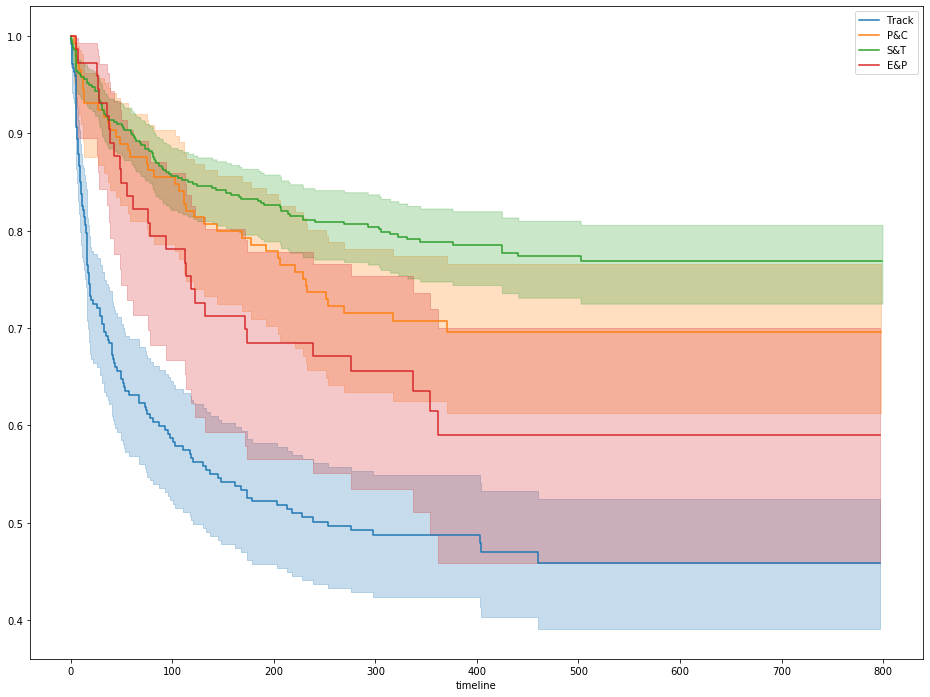

In [101]:
plt.figure(figsize=(16,12))
kmf1.fit(T[i1], E[i1], label='Track')
a1 = kmf1.plot()
kmf1.fit(T[i2], E[i2], label='P&C')
kmf1.plot(ax=a1)
kmf1.fit(T[i3], E[i3], label='S&T')
kmf1.plot(ax=a1)
kmf1.fit(T[i4], E[i4], label='E&P')
kmf1.plot(ax=a1)

In [25]:
df.columns

Index(['Asset_Number', 'ELR', 'High_Level_Asset_Class', 'Asset_Class_Grouping',
       'Grouping_Full_Name', 'Engineering_Suffix', 'System_Asset_Type',
       'EQUIP_CLASS_DESC', 'birth', 'death', 'event', 'duration', 'T',
       'Start_Latitude', 'Start_Longitude', 'End_Latitude', 'End_Longitude',
       'midpoint_Latitude', 'midpoint_Longitude', 'weather_station', 'Sum'],
      dtype='object')

In [76]:
len(df.Asset_Number.unique())

637